In [1]:
import pandas as pd
from sklearn import *

In [2]:
df = pd.read_csv("/data/credit-default.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

In [4]:
df.default.value_counts()

1    700
2    300
Name: default, dtype: int64

In [11]:
import numpy as np

In [12]:
target = "default"

y = np.where(df[target] == 2, 1, 0)
X = df.drop(columns=target)
X_dummy = pd.get_dummies(X, drop_first=True)

features = X_dummy.columns

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy, y
                , test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree = 1
                                    , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)

y_train_predict = pipe.predict(X_train)
y_test_predict = pipe.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
y_train_predict

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,

In [14]:
y_train

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,

In [15]:
metrics.confusion_matrix(y_test, y_test_predict)

array([[188,  26],
       [ 47,  39]])

In [16]:
metrics.accuracy_score(y_test, y_test_predict)

0.7566666666666667

In [17]:
df.default.value_counts()/len(df)

1    0.7
2    0.3
Name: default, dtype: float64

In [18]:
pipe.predict_proba(X_test)

array([[0.60942826, 0.39057174],
       [0.06296356, 0.93703644],
       [0.79342979, 0.20657021],
       [0.38481487, 0.61518513],
       [0.15736586, 0.84263414],
       [0.35354373, 0.64645627],
       [0.5505209 , 0.4494791 ],
       [0.7405012 , 0.2594988 ],
       [0.92922818, 0.07077182],
       [0.786845  , 0.213155  ],
       [0.17783219, 0.82216781],
       [0.52077005, 0.47922995],
       [0.89371386, 0.10628614],
       [0.95072213, 0.04927787],
       [0.62948114, 0.37051886],
       [0.59845164, 0.40154836],
       [0.97615244, 0.02384756],
       [0.91365389, 0.08634611],
       [0.96326422, 0.03673578],
       [0.1283775 , 0.8716225 ],
       [0.82652947, 0.17347053],
       [0.31581623, 0.68418377],
       [0.91710376, 0.08289624],
       [0.91664736, 0.08335264],
       [0.79798108, 0.20201892],
       [0.85722239, 0.14277761],
       [0.88800216, 0.11199784],
       [0.77276132, 0.22723868],
       [0.91060526, 0.08939474],
       [0.1085739 , 0.8914261 ],
       [0.

In [19]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_prob

array([0.39057174, 0.93703644, 0.20657021, 0.61518513, 0.84263414,
       0.64645627, 0.4494791 , 0.2594988 , 0.07077182, 0.213155  ,
       0.82216781, 0.47922995, 0.10628614, 0.04927787, 0.37051886,
       0.40154836, 0.02384756, 0.08634611, 0.03673578, 0.8716225 ,
       0.17347053, 0.68418377, 0.08289624, 0.08335264, 0.20201892,
       0.14277761, 0.11199784, 0.22723868, 0.08939474, 0.8914261 ,
       0.3687219 , 0.03176349, 0.45735348, 0.21773117, 0.30430631,
       0.92027889, 0.24340843, 0.4961519 , 0.1303132 , 0.0819819 ,
       0.09401154, 0.58658622, 0.009761  , 0.49218681, 0.04921602,
       0.03568655, 0.10812248, 0.27239898, 0.0533497 , 0.10149276,
       0.22215534, 0.45281983, 0.59676824, 0.51534091, 0.22166303,
       0.1454495 , 0.58814834, 0.65672602, 0.02847046, 0.59138439,
       0.43687783, 0.07374869, 0.52003891, 0.01800186, 0.56258666,
       0.25013105, 0.18103621, 0.05744698, 0.8604261 , 0.93227089,
       0.16641523, 0.22303058, 0.03080095, 0.59138775, 0.14556

In [20]:
import numpy as np

In [21]:
y_test_pred = np.where(y_test_prob>0.5, 1, 0)
metrics.confusion_matrix(y_test, y_test_pred)

array([[188,  26],
       [ 47,  39]])

In [22]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)

In [23]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'ROC 0.758476418169963')

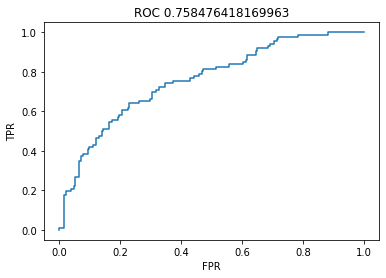

In [24]:
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC ")
auc = metrics.auc(fpr, tpr)
plt.title("ROC " + str(auc)) 

Text(0.5, 1.0, 'ROC 0.5')

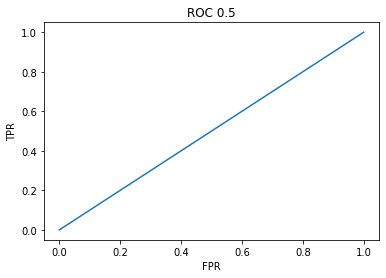

In [25]:
fpr, tpr, thresholds = metrics.roc_curve(y_test
                        , np.ones_like(y_test) * 0.5)
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC ")
auc = metrics.auc(fpr, tpr)
plt.title("ROC " + str(auc)) 

Text(0.5, 1.0, 'ROC 0.5')

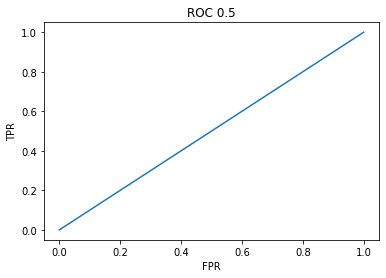

In [26]:
fpr, tpr, thresholds = metrics.roc_curve(y_test
                        , np.ones_like(y_test) * 0.8)
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC ")
auc = metrics.auc(fpr, tpr)
plt.title("ROC " + str(auc)) 

Text(0.5, 1.0, 'ROC 0.49451206259508795')

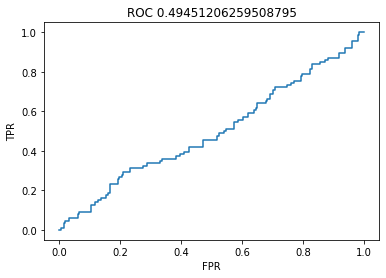

In [27]:
fpr, tpr, thresholds = metrics.roc_curve(y_test
                        , np.random.random(len(y_test)))
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC ")
auc = metrics.auc(fpr, tpr)
plt.title("ROC " + str(auc)) 

In [47]:
target = "default"

y = np.where(df[target] == 2, 1, 0)
X = df.drop(columns=target)
X_dummy = pd.get_dummies(X, drop_first=True)

features = X_dummy.columns

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy, y
                , test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree = 1
                                    , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", tree.DecisionTreeClassifier(max_depth = 3
                            , min_samples_leaf= 10))
])

pipe.fit(X_train, y_train)

y_train_predict = pipe.predict(X_train)
y_test_predict = pipe.predict(X_test)

In [48]:
print("confusion metrics: \n", metrics.confusion_matrix(y_test, y_test_predict))

print("train preicision: ", metrics.precision_score(y_train, y_train_predict))
print("test preicision: ", metrics.precision_score(y_test, y_test_predict))
print("train recall: ", metrics.recall_score(y_train, y_train_predict))
print("test recall: ", metrics.recall_score(y_test, y_test_predict))
print("train f1: ", metrics.f1_score(y_train, y_train_predict))
print("test f1: ", metrics.f1_score(y_test, y_test_predict))
print("train accuracy: ", metrics.accuracy_score(y_train, y_train_predict))
print("test accuracy: ", metrics.accuracy_score(y_test, y_test_predict))

confusion metrics: 
 [[193  21]
 [ 57  29]]
train preicision:  0.6412213740458015
test preicision:  0.58
train recall:  0.3925233644859813
test recall:  0.3372093023255814
train f1:  0.48695652173913034
test f1:  0.4264705882352941
train accuracy:  0.7471428571428571
test accuracy:  0.74


In [49]:
print(metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       214
           1       0.58      0.34      0.43        86

    accuracy                           0.74       300
   macro avg       0.68      0.62      0.63       300
weighted avg       0.72      0.74      0.72       300



In [50]:
est = pipe.steps[-1][-1]

In [51]:
from sklearn.tree import export_graphviz
export_graphviz(est, out_file = "tree.dot", feature_names = features, filled=True)
!dot -Tpng tree.dot -o tree.png


In [55]:
agg = pd.DataFrame({"feature": features
              , "importance": est.feature_importances_})
agg.sort_values("importance", ascending = False)

,feature,importance
9,checking_balance_unknown,0.533473
0,months_loan_duration,0.183929
24,savings_balance_< 100 DM,0.086350
11,credit_history_fully repaid,0.085644
39,installment_plan_none,0.060633
35,other_debtors_none,0.027046
27,employment_length_1 - 4 yrs,0.022925
36,property_other,0.000000
28,employment_length_4 - 7 yrs,0.000000
29,employment_length_> 7 yrs,0.000000


In [56]:
agg.importance.sum()

0.9999999999999998

In [58]:
target = "default"

y = np.where(df[target] == 2, 1, 0)
X = df.drop(columns=target)
X_dummy = pd.get_dummies(X, drop_first=True)

features = X_dummy.columns

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy, y
                , test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree = 1
                                    , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", ensemble.RandomForestClassifier(max_features = 0.50,
            n_estimators = 25, 
                                            max_depth = 3
                            , min_samples_leaf= 10))
])

pipe.fit(X_train, y_train)

y_train_predict = pipe.predict(X_train)
y_test_predict = pipe.predict(X_test)


print("confusion metrics: \n", metrics.confusion_matrix(y_test, y_test_predict))

print("train preicision: ", metrics.precision_score(y_train, y_train_predict))
print("test preicision: ", metrics.precision_score(y_test, y_test_predict))
print("train recall: ", metrics.recall_score(y_train, y_train_predict))
print("test recall: ", metrics.recall_score(y_test, y_test_predict))
print("train f1: ", metrics.f1_score(y_train, y_train_predict))
print("test f1: ", metrics.f1_score(y_test, y_test_predict))
print("train accuracy: ", metrics.accuracy_score(y_train, y_train_predict))
print("test accuracy: ", metrics.accuracy_score(y_test, y_test_predict))

confusion metrics: 
 [[203  11]
 [ 68  18]]
train preicision:  0.8125
test preicision:  0.6206896551724138
train recall:  0.3037383177570093
test recall:  0.20930232558139536
train f1:  0.4421768707482993
test f1:  0.31304347826086953
train accuracy:  0.7657142857142857
test accuracy:  0.7366666666666667


In [60]:
est = pipe.steps[-1][-1]
agg = pd.DataFrame({"feature": features
              , "importance": est.feature_importances_})
agg.sort_values("importance", ascending = False)

,feature,importance
9,checking_balance_unknown,0.351711
7,checking_balance_< 0 DM,0.120266
0,months_loan_duration,0.115994
1,amount,0.113448
4,age,0.062904
2,installment_rate,0.059651
39,installment_plan_none,0.046399
11,credit_history_fully repaid,0.019420
38,property_unknown/none,0.013536
26,savings_balance_unknown,0.013110
